In [30]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imagecount = 69

In [3]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [4]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
13491,00093073301,1,PillProjectDisc41/images/BNKJ2ZFS-6P83HH77DMR2...,C3PI_Reference,METOPROLOL TARTRATE TABLETS USP,PillProjectDisc41,images,BNKJ2ZFS-6P83HH77DMR2Y7OY0E-TIK.CR2,.CR2
13492,00093073301,1,PillProjectDisc57/images/CAA-RYCU0FPFITZFZ!IM6...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc57,images,CAA-RYCU0FPFITZFZ!IM6JNWX15WWGC.CR2,.CR2
13493,00093073301,1,PillProjectDisc69/images/CL4IFYKHKRSB0!O_SV5GS...,C3PI_Reference,METOPROLOL TARTRATE TABLETS USP,PillProjectDisc69,images,CL4IFYKHKRSB0!O_SV5GS!Y14E08F6B.CR2,.CR2
13494,00093073301,1,PillProjectDisc94/images/M-SZSJZO92GLQRMR-QHBN...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc94,images,M-SZSJZO92GLQRMR-QHBNN0QK3EGCE.CR2,.CR2
13495,00093073301,1,PillProjectDisc100/images/RPG75XXI2E6XU6LE!6SI...,C3PI_Test,METOPROLOL TARTRATE TABLETS USP,PillProjectDisc100,images,RPG75XXI2E6XU6LE!6SIANAZ-R__KI.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
96070,51285008070,2,PillProjectDisc6/images/2TTGM5BXEE-17KI5YBUFV5...,MC_COOKED_CALIBRATED_V1.2,LOESTRIN FE 1 / 20,PillProjectDisc6,images,2TTGM5BXEE-17KI5YBUFV5WA9M2_FZ.PNG,.PNG
96071,51285008070,2,PillProjectDisc88/images/FYOINRH5KOURSKKRUTCJ2...,MC_COOKED_CALIBRATED_V1.2,LOESTRIN FE 1 / 20,PillProjectDisc88,images,FYOINRH5KOURSKKRUTCJ2ZIGSUHF-0.PNG,.PNG
96072,51285008070,2,PillProjectDisc97/images/OGFUCUF16O20G130SNH!5...,MC_COOKED_CALIBRATED_V1.2,LOESTRIN FE 1 / 20,PillProjectDisc97,images,OGFUCUF16O20G130SNH!5!BCCGY4XY.PNG,.PNG
96073,51285008070,1,PillProjectDisc66/images/CI9G95K0PUFZ97DMLL04!...,MC_SPL_SPLIMAGE_V3.0,LOESTRIN FE 1 / 20,PillProjectDisc66,images,CI9G95K0PUFZ97DMLL04!UIKNCCJUE9.JPG,.JPG


In [5]:
dfn.DRUG.value_counts()

WARFARIN SODIUM                          74
GLIP/METFORM 5-500MG TAB                 69
LOESTRIN FE 1 / 20                       69
WARFARIN SODIUM TABLETS, USP             64
PIROXICAM                                36
VENLAFAXINE HYDROCHLORIDE TABLETS        36
LISINOPRIL TABLETS USP                   36
PAROXETINE TABLETS USP                   36
HYDROXYZINE HYDROCHLORIDE TABLETS USP    36
GLIMEPIRIDE                              36
METOPROLOL TARTRATE                      35
METOPROLOL TARTRATE TABLETS USP          34
HYDROXYZINE HYDROCHLORIDE                33
LISINOPRIL                               33
VENLAFAXINE HYDROCHLORIDE                33
PAROXETINE                               33
GLIMEPIRIDE TABLETS USP                  33
PIROXICAM CAPSULES USP                   33
Name: DRUG, dtype: int64

In [6]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(11,
 00093738001    69
 51285008070    69
 00093075601    69
 00555083102    69
 50111030801    69
 00172376160    69
 00591397301    69
 00093711598    69
 00093725601    69
 00555092502    69
 00093073301    69
 Name: NDC, dtype: int64)

In [7]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,GLIMEPIRIDE,00093725601
1,GLIMEPIRIDE TABLETS USP,00093725601
2,GLIP/METFORM 5-500MG TAB,00591397301
3,HYDROXYZINE HYDROCHLORIDE,50111030801
4,HYDROXYZINE HYDROCHLORIDE TABLETS USP,50111030801
5,LISINOPRIL,00172376160
6,LISINOPRIL TABLETS USP,00172376160
7,LOESTRIN FE 1 / 20,51285008070
8,METOPROLOL TARTRATE,00093073301
9,METOPROLOL TARTRATE TABLETS USP,00093073301


In [8]:
droplist = ['51285008070']

df = dfn[~dfn.NDC.isin(droplist)]

In [9]:
df.DRUG[df.NDC == '00093725601'] = 'GLIMEPIRIDE'
df.DRUG[df.NDC == '00591397301'] = 'GLIP/METFORM 5-500MG'
df.DRUG[df.NDC == '50111030801'] = 'HYDROXYZINE HYDROCHLORIDE'
df.DRUG[df.NDC == '00172376160'] = 'LISINOPRIL'
df.DRUG[df.NDC == '00093073301'] = 'METOPROLOL TARTRATE'
df.DRUG[df.NDC == '00093711598'] = 'PAROXETINE'
df.DRUG[df.NDC == '00093075601'] = 'PIROXICAM'
df.DRUG[df.NDC == '00093738001'] = 'VENLAFAXINE HYDROCHLORIDE'
df.DRUG[df.NDC == '00555083102'] = 'WARFARIN 5MG'
df.DRUG[df.NDC == '00555092502'] = 'WARFARIN 3MG'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
13491,00093073301,1,PillProjectDisc41/images/BNKJ2ZFS-6P83HH77DMR2...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc41,images,BNKJ2ZFS-6P83HH77DMR2Y7OY0E-TIK.CR2,.CR2
13492,00093073301,1,PillProjectDisc57/images/CAA-RYCU0FPFITZFZ!IM6...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc57,images,CAA-RYCU0FPFITZFZ!IM6JNWX15WWGC.CR2,.CR2
13493,00093073301,1,PillProjectDisc69/images/CL4IFYKHKRSB0!O_SV5GS...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc69,images,CL4IFYKHKRSB0!O_SV5GS!Y14E08F6B.CR2,.CR2
13494,00093073301,1,PillProjectDisc94/images/M-SZSJZO92GLQRMR-QHBN...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc94,images,M-SZSJZO92GLQRMR-QHBNN0QK3EGCE.CR2,.CR2
13495,00093073301,1,PillProjectDisc100/images/RPG75XXI2E6XU6LE!6SI...,C3PI_Test,METOPROLOL TARTRATE,PillProjectDisc100,images,RPG75XXI2E6XU6LE!6SIANAZ-R__KI.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
90487,50111030801,1,PillProjectDisc64/images/CGKYG74SZNKQKB1S3TH5B...,MC_COOKED_CALIBRATED_V1.2,HYDROXYZINE HYDROCHLORIDE,PillProjectDisc64,images,CGKYG74SZNKQKB1S3TH5B!A7IZ7CNXH.PNG,.PNG
90488,50111030801,1,PillProjectDisc66/images/CIOQZ2-0V9_SH9DGDG!YV...,MC_COOKED_CALIBRATED_V1.2,HYDROXYZINE HYDROCHLORIDE,PillProjectDisc66,images,CIOQZ2-0V9_SH9DGDG!YVY7UR0CUF8X.PNG,.PNG
90489,50111030801,1,PillProjectDisc75/images/CRSJ90P072001BHSO16H4...,MC_COOKED_CALIBRATED_V1.2,HYDROXYZINE HYDROCHLORIDE,PillProjectDisc75,images,CRSJ90P072001BHSO16H4X6-Q3FI9IF.PNG,.PNG
90490,50111030801,1,PillProjectDisc82/images/CXHZWHLU9O5UR6ING-WK1...,MC_COOKED_CALIBRATED_V1.2,HYDROXYZINE HYDROCHLORIDE,PillProjectDisc82,images,CXHZWHLU9O5UR6ING-WK1GNHKCIUKTN.PNG,.PNG


In [11]:
df.DRUG.value_counts()

LISINOPRIL                   69
HYDROXYZINE HYDROCHLORIDE    69
WARFARIN 3MG                 69
PAROXETINE                   69
PIROXICAM                    69
GLIMEPIRIDE                  69
VENLAFAXINE HYDROCHLORIDE    69
METOPROLOL TARTRATE          69
WARFARIN 5MG                 69
GLIP/METFORM 5-500MG         69
Name: DRUG, dtype: int64

In [12]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,GLIMEPIRIDE,00093725601
1,GLIP/METFORM 5-500MG,00591397301
2,HYDROXYZINE HYDROCHLORIDE,50111030801
3,LISINOPRIL,00172376160
4,METOPROLOL TARTRATE,00093073301
5,PAROXETINE,00093711598
6,PIROXICAM,00093075601
7,VENLAFAXINE HYDROCHLORIDE,00093738001
8,WARFARIN 3MG,00555092502
9,WARFARIN 5MG,00555083102


In [13]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/QV3PUW3N2HL6KF8HSXV_1KL7HH98!E.JPG',
 'PillProjectDisc100/images/QY_4JH6D4YSSXZZHN2L!7LGE08P4QZ.PNG']

## Sample Batch

In [14]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00093073301,1,PillProjectDisc100/images/R36MEAC5PKU8JBTEE5ZG...,C3PI_Reference,METOPROLOL TARTRATE,PillProjectDisc100,images,-ANJ2FLAWLCC1JKSWKST-DKKIZ3HDL.JPG,.CR2
1,00093075601,1,PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVO...,C3PI_Reference,PIROXICAM,PillProjectDisc1,images,!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2,.CR2
2,00093711598,1,PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXY...,C3PI_Reference,PAROXETINE,PillProjectDisc1,images,!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG,.CR2
3,00093725601,1,PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6...,C3PI_Reference,GLIMEPIRIDE,PillProjectDisc1,images,!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG,.CR2
4,00093738001,1,PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0C...,C3PI_Reference,VENLAFAXINE HYDROCHLORIDE,PillProjectDisc10,images,-3GIH4V3F8MDM8-LYTD64N9!EDOY7Q.JPG,.CR2
5,00172376160,1,PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY...,C3PI_Reference,LISINOPRIL,PillProjectDisc1,images,!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG,.CR2
6,00555083102,1,PillProjectDisc10/images/7CBG_85RQOODGTH030MF3...,C3PI_Reference,WARFARIN 5MG,PillProjectDisc10,images,--LEFD1L--JF0MZOZJBATZ3AIIUE0D.JPG,.CR2
7,00555092502,1,PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4O...,C3PI_Reference,WARFARIN 3MG,PillProjectDisc1,images,!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG,.CR2
8,00591397301,1,PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ...,C3PI_Reference,GLIP/METFORM 5-500MG,PillProjectDisc10,images,-15BUKU95KWLDB907EAOI!GAO_W893.JPG,.CR2
9,50111030801,1,PillProjectDisc104/images/UTAB9IFYP6CAVFC4QAX1...,C3PI_Reference,HYDROXYZINE HYDROCHLORIDE,PillProjectDisc104,images,-BB11LA3CMTI0O93AQ7-HIOGTXJZ7B.CR2,.CR2


In [15]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/R36MEAC5PKU8JBTEE5ZGIQ_4P92F-V.PNG',
 'PillProjectDisc104/images/UTAB9IFYP6CAVFC4QAX12AQ_63YSAG.JPG']

In [16]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

4

In [46]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

cd ..

%cd .. 

In [46]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue
    

%cd $folder

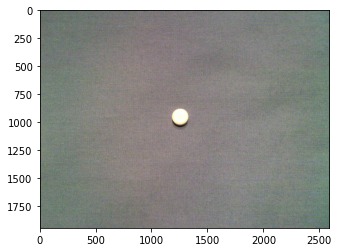

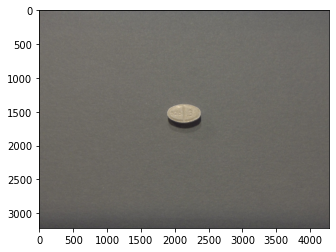

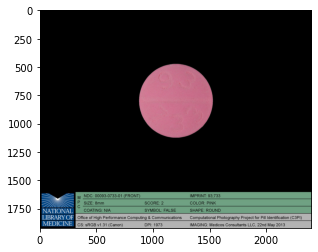

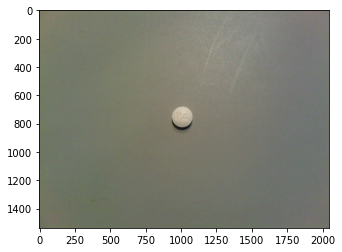

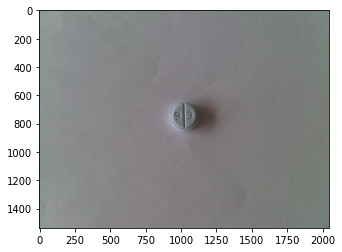

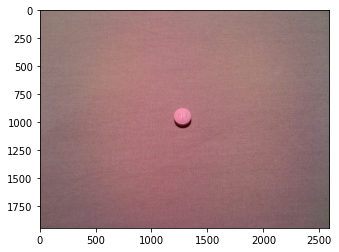

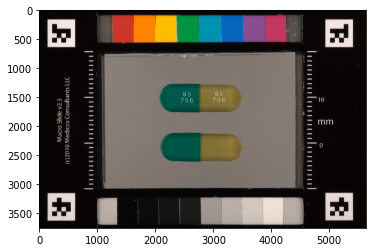

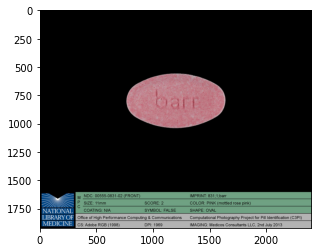

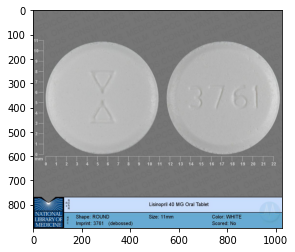

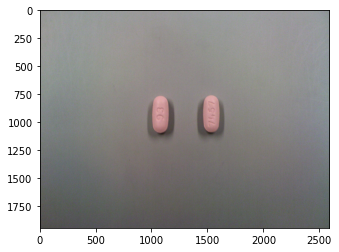

In [47]:
images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)

In [23]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [ ]:
%cd /content/drive/My Drive/Project: Pill ID/Data
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir('/content/drive/My Drive/Project: Pill ID/Data')
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')